In [4]:
# Load necessary libraries
library(forecast)
library(readr)

# Load the data
data <- read_csv("data.csv") 

# Split the data into training and test sets
train_data <- subset(data, Year < 2022 | (Year == 2022 & Quarter != "Q4"))
test_data <- subset(data, Year == 2022 & Quarter == "Q4" | Year == 2023)

# Use ts() to create time series objects
train_ts <- ts(train_data$Value, start = c(min(train_data$Year), 1), frequency = 4)
test_ts <- ts(test_data$Value, start = c(min(test_data$Year), 1), frequency = 4)

# Define the range for alpha, beta, and gamma
alpha_range <- seq(0.1, 1, by = 0.1)
beta_range <- seq(0.1, 1, by = 0.1)
gamma_range <- seq(0.1, 1, by = 0.1)

# Initialize variables to store the best parameters and lowest RMSE and MAPE
best_params <- list(alpha=NULL, beta=NULL, gamma=NULL)
lowest_rmse <- Inf
lowest_mape <- Inf

# Loop through all combinations of alpha, beta, and gamma
for (alpha in alpha_range) {
  for (beta in beta_range) {
    for (gamma in gamma_range) {
      # Fit the model on the training set
      fit <- HoltWinters(train_ts, alpha = alpha, beta = beta, gamma = gamma)
      
      # Forecast the test period
      forecast_length <- length(test_ts)
      forecast <- forecast(fit, h = forecast_length)
      
      # Calculate RMSE and MAPE
      rmse <- mean((forecast$mean - test_ts)^2)
      mape <- mean(abs((forecast$mean - test_ts) / test_ts)) * 100
      
      # Update best parameters if necessary
      if (rmse < lowest_rmse) {
        lowest_rmse <- rmse
        best_params$alpha <- alpha
        best_params$beta <- beta
        best_params$gamma <- gamma
      }
      
      if (mape < lowest_mape) {
        lowest_mape <- mape
        best_params_mape <- list(alpha=alpha, beta=beta, gamma=gamma)
      }
    }
  }
}

# Print the best parameters and the corresponding RMSE and MAPE
cat("Best parameters for RMSE:\n")
cat("alpha:", best_params$alpha, "\nbeta:", best_params$beta, "\ngamma:", best_params$gamma, "\n")
cat("Lowest RMSE:", lowest_rmse, "\n\n")

cat("Best parameters for MAPE:\n")
cat("alpha:", best_params_mape$alpha, "\nbeta:", best_params_mape$beta, "\ngamma:", best_params_mape$gamma, "\n")
cat("Lowest MAPE:", lowest_mape, "\n")

Rows: 59 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Quarter
dbl (2): Year, Value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Best parameters for RMSE:
alpha: 0.9 
beta: 0.5 
gamma: 0.3 
Lowest RMSE: 0.1392739 

Best parameters for MAPE:
alpha: 0.9 
beta: 0.5 
gamma: 0.3 
Lowest MAPE: 0.005719451 


        Point Forecast    Lo 80     Hi 80     Lo 95     Hi 95
2023 Q4       6535.347 5548.236  7522.458 5025.6913  8045.003
2024 Q1       6329.138 4670.762  7987.514 3792.8705  8865.405
2024 Q2       6965.901 4535.422  9396.381 3248.8043 10682.998
2024 Q3       6817.926 3525.500 10110.352 1782.5949 11853.257
2024 Q4       6786.470 2531.815 11041.125  279.5369 13293.403


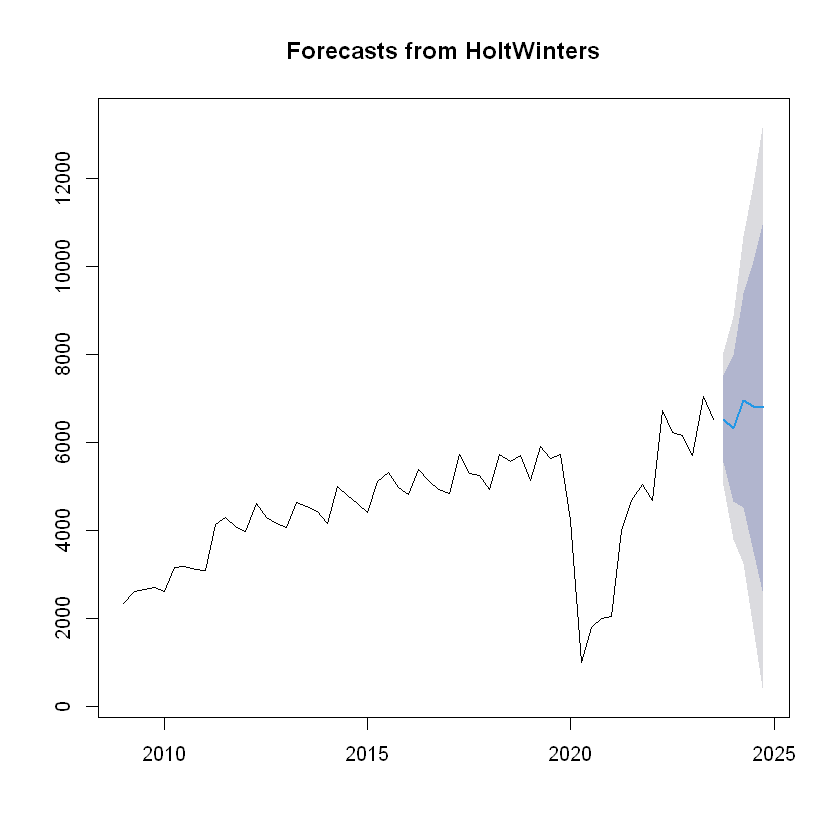

In [5]:
# Fit the model on the entire dataset using best parameters found
all_data_ts <- ts(data$Value, start = c(min(data$Year), 1), frequency = 4)
final_fit <- HoltWinters(all_data_ts, alpha = best_params$alpha, beta = best_params$beta, gamma = best_params$gamma)

# Forecast future values starting from 2023 Q4
future_forecast <- forecast(final_fit, h = 5) # Adjust the horizon as needed
plot(future_forecast)
print(future_forecast)

# Plotting the Data and the Forecasted values

`geom_smooth()` using formula 'y ~ x'



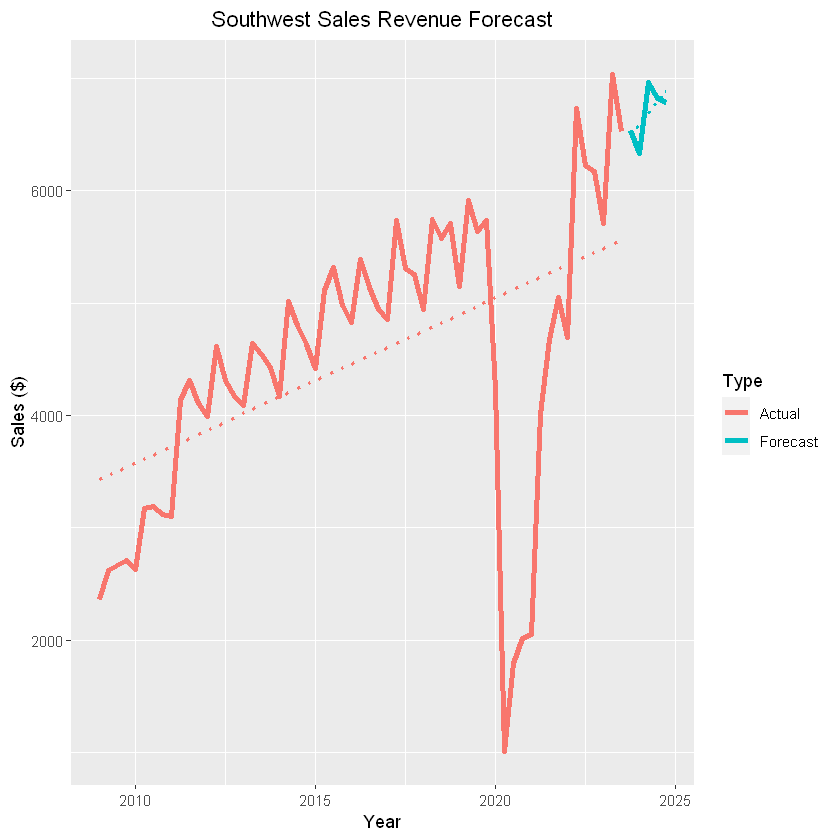

In [6]:
library(ggplot2)
library(zoo)

# define a list with the dates of all the quarters from 2009 to 2024
Dates <- c(as.Date("2009-01-01"), as.Date("2009-04-01"), as.Date("2009-07-01"), as.Date("2009-10-01"), 
  as.Date("2010-01-01"), as.Date("2010-04-01"), as.Date("2010-07-01"), as.Date("2010-10-01"), as.Date("2011-01-01"), 
  as.Date("2011-04-01"), as.Date("2011-07-01"), as.Date("2011-10-01"), as.Date("2012-01-01"), as.Date("2012-04-01"), 
  as.Date("2012-07-01"), as.Date("2012-10-01"), as.Date("2013-01-01"), as.Date("2013-04-01"), as.Date("2013-07-01"), 
  as.Date("2013-10-01"), as.Date("2014-01-01"), as.Date("2014-04-01"), as.Date("2014-07-01"), as.Date("2014-10-01"), 
  as.Date("2015-01-01"), as.Date("2015-04-01"), as.Date("2015-07-01"), as.Date("2015-10-01"), as.Date("2016-01-01"), 
  as.Date("2016-04-01"), as.Date("2016-07-01"), as.Date("2016-10-01"), as.Date("2017-01-01"), as.Date("2017-04-01"), 
  as.Date("2017-07-01"), as.Date("2017-10-01"), as.Date("2018-01-01"), as.Date("2018-04-01"), as.Date("2018-07-01"), 
  as.Date("2018-10-01"), as.Date("2019-01-01"), as.Date("2019-04-01"), as.Date("2019-07-01"), as.Date("2019-10-01"), 
  as.Date("2020-01-01"), as.Date("2020-04-01"), as.Date("2020-07-01"), as.Date("2020-10-01"), as.Date("2021-01-01"), 
  as.Date("2021-04-01"), as.Date("2021-07-01"), as.Date("2021-10-01"), as.Date("2022-01-01"), as.Date("2022-04-01"),
  as.Date("2022-07-01"), as.Date("2022-10-01"), as.Date("2023-01-01"), as.Date("2023-04-01"), as.Date("2023-07-01"),
  as.Date("2023-10-01"), as.Date("2024-01-01"), as.Date("2024-04-01"), as.Date("2024-07-01"), as.Date("2024-10-01"))

# Convert the forecast to a data frame
forecast_df <- data.frame(
  Date = Dates,
  Value = c(data$Value, future_forecast$mean),
  Type = c(rep("Actual", 59), rep("Forecast", 5))
)

# add a linear trend line in the plot for the actual values and make it a dotted line
ggplot(forecast_df, aes(x = Date, y = Value, color = Type)) +
  geom_line(size = 1.5) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dotted") +
  # align title with center of the plot
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(title = "Southwest Sales Revenue Forecast",
       x = "Year",
       y = "Sales ($)")

In [7]:
summary(future_forecast)


Forecast method: HoltWinters

Model Information:
Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = all_data_ts, alpha = best_params$alpha, beta = best_params$beta,     gamma = best_params$gamma)

Smoothing parameters:
 alpha: 0.9
 beta : 0.5
 gamma: 0.3

Coefficients:
         [,1]
a  6506.07477
b    62.78064
s1  -33.50803
s2 -302.49834
s3  271.48471
s4   60.72871

Error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set -2.298762 763.216 440.2677 -2.087719 16.56434 0.5190723
                    ACF1
Training set -0.05627474

Forecasts:
        Point Forecast    Lo 80     Hi 80     Lo 95     Hi 95
2023 Q4       6535.347 5548.236  7522.458 5025.6913  8045.003
2024 Q1       6329.138 4670.762  7987.514 3792.8705  8865.405
2024 Q2       6965.901 4535.422  9396.381 3248.8043 10682.998
2024 Q3       6817.926 3525.500 10110.352 1782.5949 11853.257
2024 Q4       6786.470 2531.815 11041.125  279.5369 1